# Improving neural network by optimizing gradient descent

 1. Change the number of observations to 100,000 and see what happens.
    2. Change the number of observations to 1,000,000 and see what happens.
    3. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
    4. Change the loss function. L2-norm loss (without dividing by 2) is a good way to start. 
    5. Тry with the L1-norm loss, given by the sum of the ABSOLUTE value of yj - tj. The L1-norm loss is given by:
## $$ \Sigma_i = |y_i-t_i| $$
    6. Create a function f(x,z) = 13*xs + 7*zs - 12. Does the algorithm work in the same way?
    
   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [2]:
# declare a variable containing the size of the training set to generate
observations = 10000
xs = np.random.uniform(low = -10, size =(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

#combine two dimensions of the input into one input matrix
# This is the X matrix from the linear model y=ax+b where a = weight, b= bias
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(10000, 2)


### Generate the targets we will aim at

In [3]:
# We want to "make up" a function, use the ML methodology, and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets just in case. It should be n x m, where m is the number of output variables, so 1000 x 1.
print (targets.shape)

(10000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

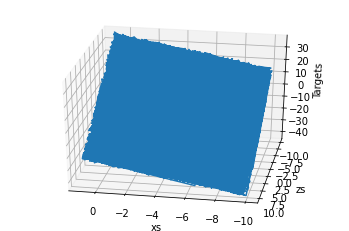

In [4]:
targets = targets.reshape(observations,)

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

ax.plot(xs,zs,targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

# Initialize Variables

In [5]:
init_range = 0.1

weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print(weights)
print(biases)

[[ 0.01973339]
 [-0.02630572]]
[-0.05816909]


### set a learning rate

In [6]:
learning_rate = 0.02

In [7]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs-targets
    loss = np.sum(deltas**2)/ 2 / observations
    
    print (loss)
    
    deltas_scaled = deltas/ observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    

174.29473068454126
24.092065779011747
6.827886269061843
4.778538734557276
4.489139372996937
4.406282097914564
4.348531204404682
4.29441299281675
4.241343063756377
4.188998905077391
4.137332974614578
4.086331757672261
4.035986099950261
3.9862874971983766
3.9372276231209815
3.888798267400806
3.8409913264248177
3.793798800885908
3.747212794305468
3.701225511693422
3.655829258241403
3.6110164380348753
3.5667795527821085
3.523111200559511
3.4800040745731122
3.4374509619359594
3.3954447424612098
3.3539783874707565
3.3130449586191624
3.2726376067326908
3.2327495706632776
3.193374176157222
3.1545048347384195
3.116135042605952
3.0782583795458236
3.0408685078567292
3.00395917128957
2.9675241940006507
2.931557479518301
2.8960530097227775
2.8610048438392974
2.826407117443989
2.7922540414826393
2.758539901302029
2.72525905569374
2.6924059359502404
2.6599750449330974
2.6279609561531787
2.5963583128626544
2.5651618271586933
2.5343662790986605
2.5039665158266904
2.4739574507114894
2.4443340624952152
2

### Print weights and biases and see if we have worked correctly

In [8]:
print (weights, biases)

[[ 1.58905249]
 [-2.99509015]] [2.25275205]


### plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

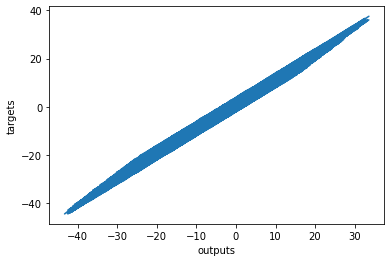

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()